In [1]:
import geopandas as gp 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataFolder = '/work/group/egodat/reu23_clark/data'
statesShp = gp.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)

In [3]:
CBSAs = gp.read_file(dataFolder + "/tl_2019_us_cbsa.zip").to_crs(3857)

In [4]:
CBSAs

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,122,12020,12020,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",M1,1,G3110,2654601832,26140309,+33.9439840,-083.2138965,"POLYGON ((-9299339.399 4024225.385, -9298722.4..."
1,122,12060,12060,"Atlanta-Sandy Springs-Alpharetta, GA","Atlanta-Sandy Springs-Alpharetta, GA Metro Area",M1,1,G3110,22494938651,387716575,+33.6937280,-084.3999113,"POLYGON ((-9499808.416 3982318.514, -9499830.0..."
2,428,12100,12100,"Atlantic City-Hammonton, NJ","Atlantic City-Hammonton, NJ Metro Area",M1,1,G3110,1438776649,301268696,+39.4693555,-074.6337591,"POLYGON ((-8333014.948 4782122.394, -8333009.7..."
3,426,12120,12120,"Atmore, AL","Atmore, AL Micro Area",M2,2,G3110,2448115116,20504948,+31.1222867,-087.1684097,"POLYGON ((-9753303.463 3638074.432, -9753303.2..."
4,258,12140,12140,"Auburn, IN","Auburn, IN Micro Area",M2,2,G3110,939731962,2657419,+41.4011894,-085.0001854,"POLYGON ((-9483635.192 5068556.085, -9483636.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,556,49060,49060,"Winfield, KS","Winfield, KS Micro Area",M2,2,G3110,2915648165,17322935,+37.2345068,-096.8372468,"POLYGON ((-10814782.844 4481524.994, -10814783..."
934,None,49080,49080,"Winnemucca, NV","Winnemucca, NV Micro Area",M2,2,G3110,24969533319,44196978,+41.4079136,-118.1275915,"POLYGON ((-13233024.775 5006594.818, -13233215..."
935,None,49100,49100,"Winona, MN","Winona, MN Micro Area",M2,2,G3110,1621638207,40051890,+43.9822682,-091.7767076,"POLYGON ((-10250133.062 5468589.383, -10250142..."
936,268,49180,49180,"Winston-Salem, NC","Winston-Salem, NC Metro Area",M1,1,G3110,5202351920,81366294,+36.0788515,-080.3450642,"POLYGON ((-8955841.577 4336663.225, -8955841.5..."


In [5]:
# parklands = gp.read_file(dataFolder + "/ParkServe_Shapefiles_05152023/ParkServe_Parks.shp").to_crs(3857)
# parklands.to_pickle(dataFolder + "/ParkServe_Shapefiles_05152023/ParkServe_Parks.shp.pkl")
parklands = pd.read_pickle(dataFolder + "/ParkServe_Shapefiles_05152023/ParkServe_Parks.shp.pkl")

In [6]:
parklands

,ParkID,GISTrkrID,SourceID,Park_Name,Park_Desig,Park_Owner,Park_Local,Park_Manag,Park_Loc_1,Park_Acces,...,SUM_BLACK_,SUM_AMERIN,SUM_ASIAN_,SUM_PACIFI,SUM_OTHRAC,SUM_RACE2U,SUM_HISP_S,Shape_Leng,Shape_Area,geometry
0,3901000-0001,3089,1,Hampton Hills Park,LP,CITY,City of Akron,CITY,City of Akron,3,...,42.0,0.0,10.0,0.0,1.0,28.0,12.0,5987.262459,1.284227e+06,"POLYGON ((-9077774.893 5037650.225, -9077775.3..."
1,3901000-0002,3089,2,Frank Boulevard Park,LP,CITY,City of Akron,CITY,City of Akron,3,...,263.0,0.0,27.0,2.0,4.0,46.0,27.0,2078.901104,8.330906e+04,"POLYGON ((-9082642.289 5028249.776, -9082705.8..."
2,3901000-0003,3089,3,Fairlawn Heights Park,LP,CITY,City of Akron,CITY,City of Akron,3,...,478.0,3.0,66.0,1.0,10.0,168.0,95.0,3335.723571,3.968775e+04,"MULTIPOLYGON (((-9083024.502 5028703.676, -908..."
3,3901000-0004,3089,4,Northwest Park,LP,CITY,City of Akron,CITY,City of Akron,3,...,506.0,3.0,19.0,0.0,22.0,148.0,96.0,697.372809,2.558549e+04,"POLYGON ((-9081041.007 5029375.206, -9081039.4..."
4,3901000-0005,3089,5,Westgate Manor Park,LP,CITY,City of Akron,CITY,City of Akron,3,...,416.0,0.0,30.0,0.0,8.0,88.0,43.0,1748.897548,6.281689e+04,"MULTIPOLYGON (((-9080747.594 5028218.902, -908..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143684,2146027-0344,0,0,New Acquisition,LP,CNTY,None,UNKNOWN,None,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1736.559894,1.640465e+05,"POLYGON ((-9388988.652 4562997.837, -9388941.7..."
143685,2146027-0346,0,0,LAFAYETTE (GLEN LOCKDALE),LCA,REGIONAL,Division of Environmental Services,REGIONAL,Division of Environmental Services,3,...,94.0,2.0,173.0,0.0,4.0,72.0,82.0,1978.622147,3.589086e+04,"POLYGON ((-9410986.263 4575622.118, -9410985.8..."
143686,2146027-0426,0,0,GAINESWAY PARK,LP,CITY,City of Lexington and County of Fayette,CITY,City of Lexington and County of Fayette,3,...,1702.0,9.0,90.0,2.0,26.0,246.0,359.0,1590.883047,7.869018e+04,"POLYGON ((-9404077.463 4576789.544, -9404126.1..."
143687,2146027-0427,0,0,"TOWN BRANCH 5, 6, 9",LCA,REGIONAL,Lexington-Fayette Urban County Government,AUTHORITY,Division of Environmental Services,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,637.054649,5.343609e+03,"POLYGON ((-9413035.014 4592159.129, -9413028.0..."


<AxesSubplot:>

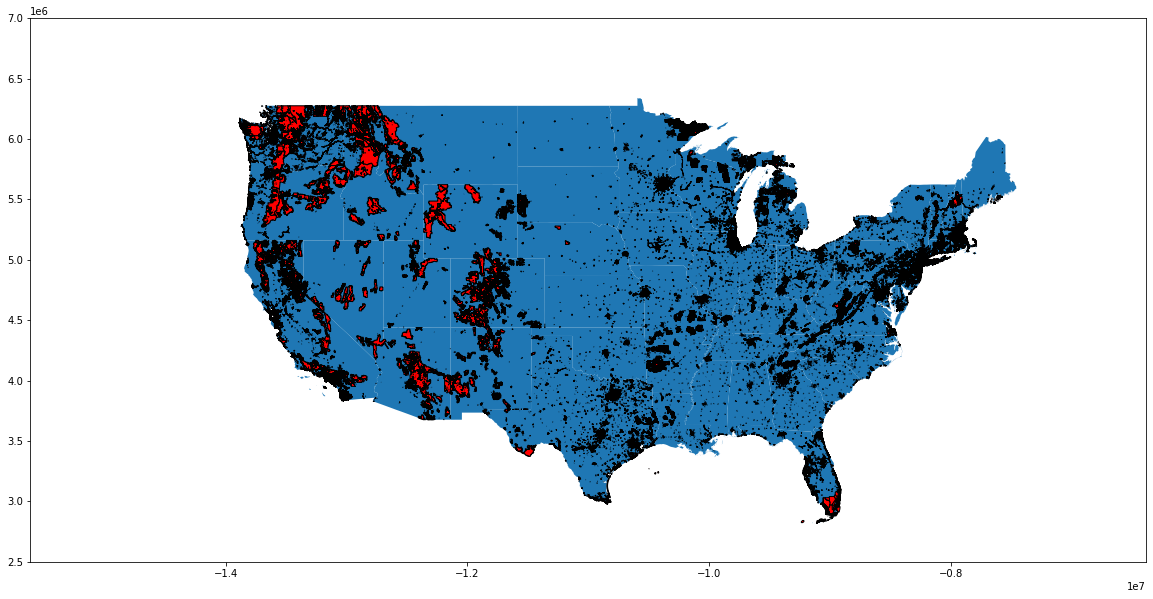

In [7]:
def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

ax = plotUS()
parklands.plot(ax=ax, color = 'red', edgecolor='black', linewidth=1)

In [8]:
merged = gp.sjoin(parklands, CBSAs, how='left')

In [10]:
def parkAreaInCbsa(row):
    parksInCbsa = merged[merged['CBSAFP'] == row['CBSAFP']]
    areas = parksInCbsa['geometry'].apply(lambda x: x.intersection(row['geometry']).area)
    return areas.sum()

CBSAs['parkArea'] = CBSAs.apply(parkAreaInCbsa, axis=1)

41682182.01000572
1028590076.363437
177948122.24175155
1012631.4372508787
2225804.4946909463
1773856.829797102
4118287.941654891
23172116.682032056
4697588.616883193
6085253.704579083
868571764.6349947
2431775.192925971
3166717917.395315
527230923.2942128
16469234.387345882
94995578.23912874
2535035.044546498
231311277.04253998
164928934.40319437
1977142.9428563179
3409469.563695831
693607.3222532247
39311273.7495409
11934170.777995624
20564485.13911254
240675405.88281563
1596722.791004649
1075770579.7616372
239872698.7576467
5071238.263737987
108876189.00613132
6522589.686394684
10461649.481799481
8363467224.408804
17540902.12794824
7732618065.798559
4212940.951244691
1219387372.9529345
1891026289.325419
28826489.550236277
9581516.979111392
239328179.32313687
12101910.016821573
26006430.064576104
94592482.32773009
14927633.697292827
1039345.8219116802
679174698.5049338
5138545.813189543
142833385.0460326
53947304.96896989
561084231.7635665
1244968.2623689654
5207884.924853537
37594612

In [11]:
CBSAs['area'] = CBSAs.area
CBSAs['parkAreaPct'] = CBSAs['parkArea'] / CBSAs['area']

In [12]:
CBSAs

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,parkArea,area,parkAreaPct
0,122,12020,12020,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",M1,1,G3110,2654601832,26140309,+33.9439840,-083.2138965,"POLYGON ((-9299339.399 4024225.385, -9298722.4...",4.168218e+07,3.905623e+09,0.010672
1,122,12060,12060,"Atlanta-Sandy Springs-Alpharetta, GA","Atlanta-Sandy Springs-Alpharetta, GA Metro Area",M1,1,G3110,22494938651,387716575,+33.6937280,-084.3999113,"POLYGON ((-9499808.416 3982318.514, -9499830.0...",1.028590e+09,3.314292e+10,0.031035
2,428,12100,12100,"Atlantic City-Hammonton, NJ","Atlantic City-Hammonton, NJ Metro Area",M1,1,G3110,1438776649,301268696,+39.4693555,-074.6337591,"POLYGON ((-8333014.948 4782122.394, -8333009.7...",1.779481e+08,2.923626e+09,0.060866
3,426,12120,12120,"Atmore, AL","Atmore, AL Micro Area",M2,2,G3110,2448115116,20504948,+31.1222867,-087.1684097,"POLYGON ((-9753303.463 3638074.432, -9753303.2...",1.012631e+06,3.379372e+09,0.000300
4,258,12140,12140,"Auburn, IN","Auburn, IN Micro Area",M2,2,G3110,939731962,2657419,+41.4011894,-085.0001854,"POLYGON ((-9483635.192 5068556.085, -9483636.4...",2.225804e+06,1.676177e+09,0.001328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,556,49060,49060,"Winfield, KS","Winfield, KS Micro Area",M2,2,G3110,2915648165,17322935,+37.2345068,-096.8372468,"POLYGON ((-10814782.844 4481524.994, -10814783...",2.236098e+07,4.635827e+09,0.004824
934,None,49080,49080,"Winnemucca, NV","Winnemucca, NV Micro Area",M2,2,G3110,24969533319,44196978,+41.4079136,-118.1275915,"POLYGON ((-13233024.775 5006594.818, -13233215...",2.104482e+09,4.450584e+10,0.047286
935,None,49100,49100,"Winona, MN","Winona, MN Micro Area",M2,2,G3110,1621638207,40051890,+43.9822682,-091.7767076,"POLYGON ((-10250133.062 5468589.383, -10250142...",8.682733e+06,3.210700e+09,0.002704
936,268,49180,49180,"Winston-Salem, NC","Winston-Salem, NC Metro Area",M1,1,G3110,5202351920,81366294,+36.0788515,-080.3450642,"POLYGON ((-8955841.577 4336663.225, -8955841.5...",4.408910e+07,8.105513e+09,0.005439


<AxesSubplot:>

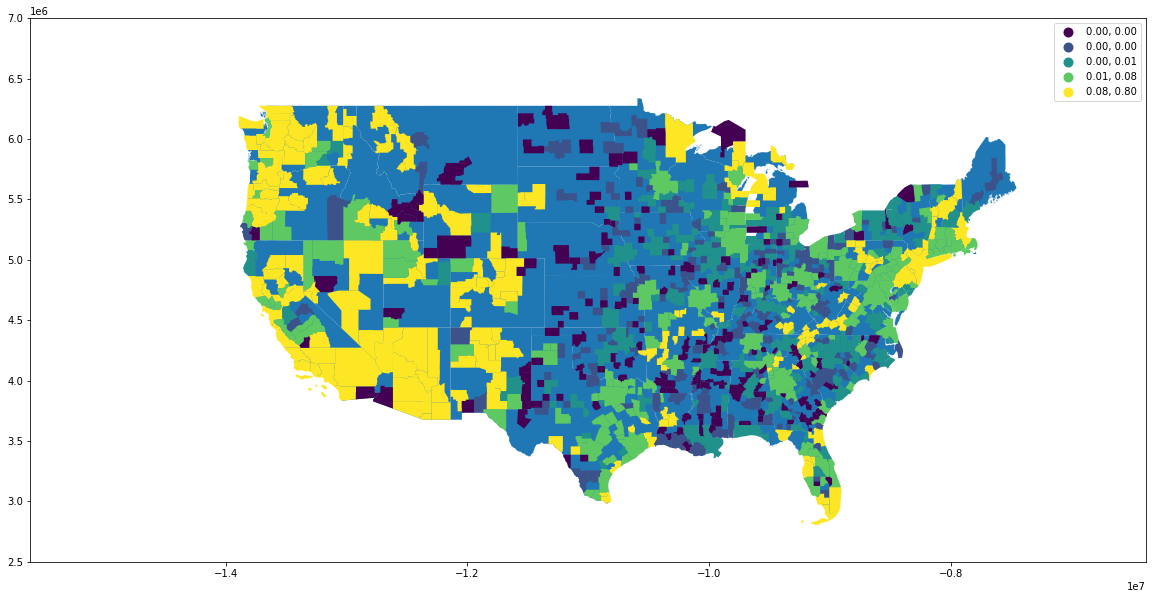

In [13]:
ax = plotUS()
CBSAs.plot(ax=ax, column='parkAreaPct', legend=True, scheme='quantiles')

In [14]:
data = CBSAs[['CBSAFP', 'NAME', 'area', 'parkArea', 'parkAreaPct']].rename(columns={'CBSAFP': 'CBSA'})
data['CBSA'] = data['CBSA'].astype(int)
data.sort_values(by='parkAreaPct')

,CBSA,NAME,area,parkArea,parkAreaPct
182,19700,"Deming, NM",1.075327e+10,2.649627e+05,0.000025
138,22840,"Fort Payne, AL",2.973820e+09,9.243900e+04,0.000031
838,44740,"Storm Lake, IA",2.787121e+09,1.345713e+05,0.000048
723,39940,"Rexburg, ID",1.191941e+10,7.667328e+05,0.000064
184,19760,"DeRidder, LA",4.092927e+09,2.673509e+05,0.000065
...,...,...,...,...,...
33,13380,"Bellingham, WA",1.495734e+10,8.363467e+09,0.559155
395,26220,"Hood River, OR",2.813166e+09,1.725211e+09,0.613263
453,28540,"Ketchikan, AK",5.355920e+10,3.864062e+10,0.721456
65,14720,"Breckenridge, CO",2.707656e+09,2.135657e+09,0.788748


In [15]:
data.to_pickle(dataFolder + '/parklands.pkl')

## Unused

In [ ]:
sum(parklands["geometry"].intersects(CBSAs.iloc[0]["geometry"]))

In [ ]:
parklands.shape[0]

In [ ]:
def findAreaSingularCBSA(parklands, CBSA):
    area = 0
    for i in range(parklands.shape[0]):
        if parklands.iloc[i]["geometry"].intersects(CBSA["geometry"]):
            area += parklands.iloc[i]["Shape_Area"]
    return area

findAreaSingularCBSA(parklands, CBSAs.iloc[0])
    # Does geom intersect any metro area?
    # if geom is None:
    #     return False
#    for CBSA in CBSAs['geometry']:
#        if CBSA.intersects(geom):
#            return True
#    return False
#for park in parklands['geometry']: 
#    print(sum(inCBSA(park)))


In [ ]:
parklands.iloc[0]["geometry"].area

In [ ]:
CBSAs["Total Parks Area"] = CBSAs.apply(findAreaSinglularCBSA) 

In [16]:
merged["CBSAFP"].apply(type).unique()

array([<class 'str'>], dtype=object)

In [ ]:
merged[merged["Park_Name"].apply(lambda x : "Grand Canyon" in x if x != None else False)]

,ParkID,GISTrkrID,SourceID,Park_Name,Park_Desig,Park_Owner,Park_Local,Park_Manag,Park_Loc_1,Park_Acces,...,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON
10972,3240000-0226,152,0,Grand Canyon Terrace Unit,PPRK,PRIV,ASHLEY RIDGE ASSOCIATION,PRIV,ASHLEY RIDGE ASSOCIATION,3,...,29820,"Las Vegas-Henderson-Paradise, NV","Las Vegas-Henderson-Paradise, NV Metro Area",M1,1,G3110,20439276974,438416032,+36.2142575,-115.0138120
10998,3240000-0252,152,0,Grand Canyon Terrace Unit,PPRK,PRIV,ASHLEY RIDGE ASSOCIATION,PRIV,ASHLEY RIDGE ASSOCIATION,3,...,29820,"Las Vegas-Henderson-Paradise, NV","Las Vegas-Henderson-Paradise, NV Metro Area",M1,1,G3110,20439276974,438416032,+36.2142575,-115.0138120
10999,3240000-0253,152,0,Grand Canyon Terrace Unit,PPRK,PRIV,ASHLEY RIDGE ASSOCIATION,PRIV,ASHLEY RIDGE ASSOCIATION,3,...,29820,"Las Vegas-Henderson-Paradise, NV","Las Vegas-Henderson-Paradise, NV Metro Area",M1,1,G3110,20439276974,438416032,+36.2142575,-115.0138120
11000,3240000-0254,152,0,Grand Canyon Terrace Unit,PPRK,PRIV,ASHLEY RIDGE ASSOCIATION,PRIV,ASHLEY RIDGE ASSOCIATION,3,...,29820,"Las Vegas-Henderson-Paradise, NV","Las Vegas-Henderson-Paradise, NV Metro Area",M1,1,G3110,20439276974,438416032,+36.2142575,-115.0138120
71505,0603526-0098,166,7157,Grand Canyon Park,LP,CITY,CITY OF BAKERSFIELD,CITY,CITY OF BAKERSFIELD,3,...,12540,"Bakersfield, CA","Bakersfield, CA Metro Area",M1,1,G3110,21062540828,78680980,+35.3466288,-118.7295064
105385,3584740-0005,0,5,Grand Canyon Playlot,LP,CNTY,County of Los Alamos,CNTY,County of Los Alamos,3,...,31060,"Los Alamos, NM","Los Alamos, NM Micro Area",M2,2,G3110,282843396,208105,+35.8700469,-106.3079679


<AxesSubplot:>

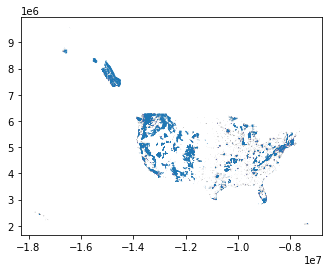

In [38]:
merged.plot()

<AxesSubplot:>

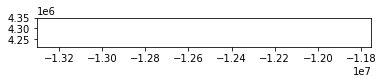

In [39]:
merged[merged["Park_Name"].apply(lambda x : "Grand Canyon" in x if x != None else False)].plot()

KeyboardInterrupt: 

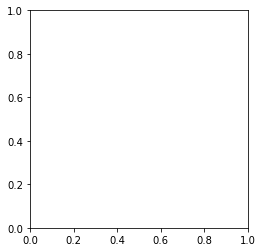

In [40]:
merged.plot()

<AxesSubplot:>

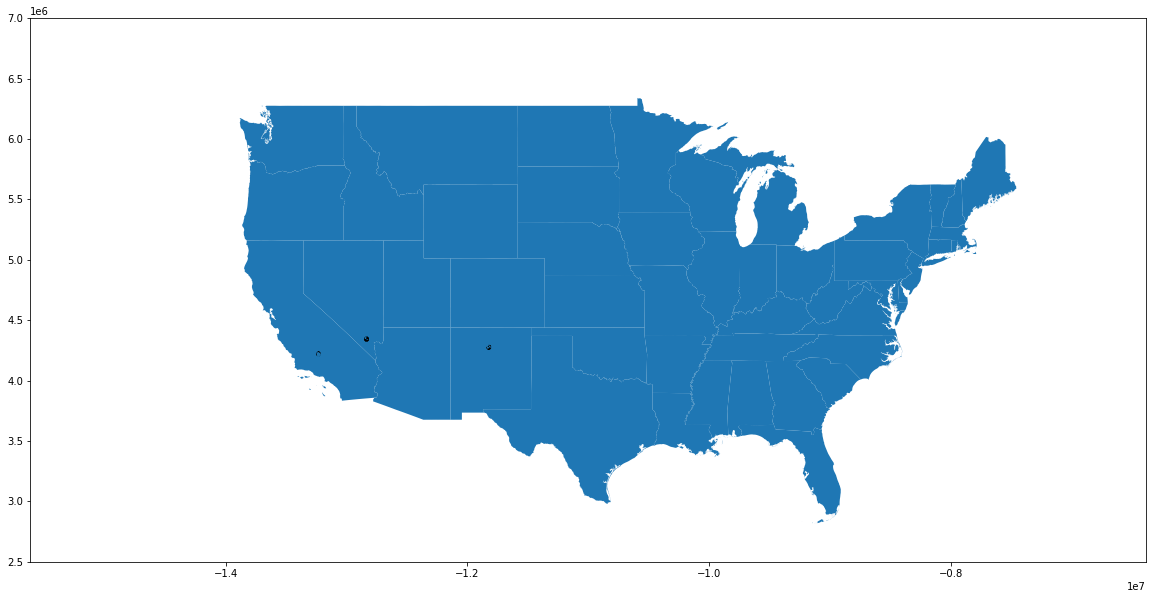

In [55]:
ax = plotUS()
parklands[parklands["Park_Name"].apply(lambda x : "Grand Canyon" in x if x != None else False)].plot(ax=ax, edgecolor='black', color='black', linewidth=5)

In [56]:
parklands[parklands["Park_Name"].apply(lambda x : "Grand Canyon" in x if x != None else False)]

,ParkID,GISTrkrID,SourceID,Park_Name,Park_Desig,Park_Owner,Park_Local,Park_Manag,Park_Loc_1,Park_Acces,...,SUM_BLACK_,SUM_AMERIN,SUM_ASIAN_,SUM_PACIFI,SUM_OTHRAC,SUM_RACE2U,SUM_HISP_S,Shape_Leng,Shape_Area,geometry
10972,3240000-0226,152,0,Grand Canyon Terrace Unit,PPRK,PRIV,ASHLEY RIDGE ASSOCIATION,PRIV,ASHLEY RIDGE ASSOCIATION,3,...,115.0,2.0,78.0,4.0,5.0,78.0,195.0,124.365550,935.650971,"POLYGON ((-12835710.024 4343786.908, -12835710..."
10998,3240000-0252,152,0,Grand Canyon Terrace Unit,PPRK,PRIV,ASHLEY RIDGE ASSOCIATION,PRIV,ASHLEY RIDGE ASSOCIATION,3,...,56.0,1.0,39.0,3.0,1.0,38.0,95.0,129.784127,788.685482,"POLYGON ((-12835442.989 4343792.659, -12835411..."
10999,3240000-0253,152,0,Grand Canyon Terrace Unit,PPRK,PRIV,ASHLEY RIDGE ASSOCIATION,PRIV,ASHLEY RIDGE ASSOCIATION,3,...,52.0,1.0,36.0,3.0,1.0,35.0,85.0,94.852843,574.827625,"POLYGON ((-12835463.017 4343885.684, -12835458..."
11000,3240000-0254,152,0,Grand Canyon Terrace Unit,PPRK,PRIV,ASHLEY RIDGE ASSOCIATION,PRIV,ASHLEY RIDGE ASSOCIATION,3,...,57.0,1.0,39.0,3.0,1.0,38.0,94.0,123.077579,920.871906,"POLYGON ((-12835497.563 4343798.528, -12835497..."
71505,0603526-0098,166,7157,Grand Canyon Park,LP,CITY,CITY OF BAKERSFIELD,CITY,CITY OF BAKERSFIELD,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,622.735448,7687.099440,"POLYGON ((-13233005.378 4220826.204, -13232987..."
105385,3584740-0005,0,5,Grand Canyon Playlot,LP,CNTY,County of Los Alamos,CNTY,County of Los Alamos,3,...,7.0,13.0,74.0,1.0,13.0,97.0,353.0,2208.218589,120859.555778,"POLYGON ((-11823417.905 4275916.853, -11823063..."
